<a href="https://colab.research.google.com/github/Ravi-ranjan1801/DIP-Lab-/blob/main/dip_lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

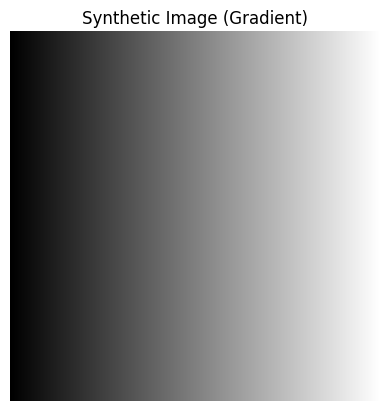

In [2]:
# Create a synthetic 256x256 gradient image
synthetic = np.tile(np.arange(256, dtype=np.uint8), (256, 1))

plt.imshow(synthetic, cmap='gray')
plt.title("Synthetic Image (Gradient)")
plt.axis('off')


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

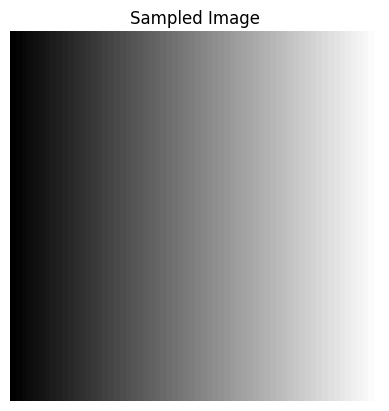

In [3]:
sampled = synthetic[::4, ::4]   # downsampling

plt.imshow(sampled, cmap='gray')
plt.title("Sampled Image")
plt.axis('off')


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

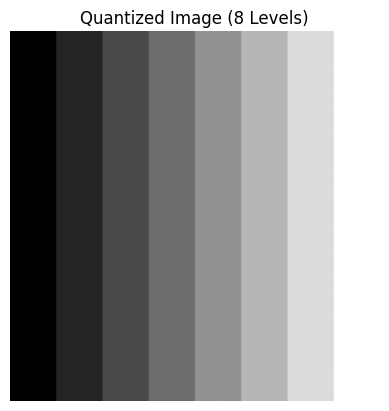

In [4]:
levels = 8
quantized = (synthetic // (256 // levels)) * (256 // levels)

plt.imshow(quantized, cmap='gray')
plt.title("Quantized Image (8 Levels)")
plt.axis('off')


In [5]:
p1 = np.array([200, 300])
p2 = np.array([700, 900])

dx = abs(p1[0] - p2[0])
dy = abs(p1[1] - p2[1])

De = np.sqrt(dx**2 + dy**2)      # Euclidean
D4 = dx + dy                    # City block
D8 = max(dx, dy)                # Chessboard

print("Euclidean Distance (De):", De)
print("City Block Distance (D4):", D4)
print("Chessboard Distance (D8):", D8)


Euclidean Distance (De): 781.0249675906655
City Block Distance (D4): 1100
Chessboard Distance (D8): 600


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

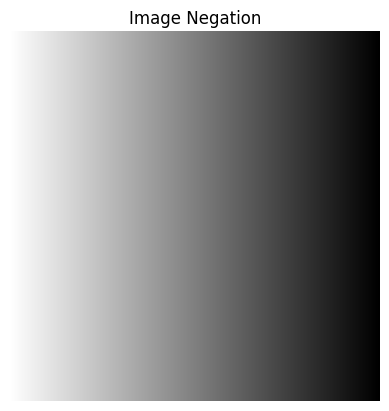

In [6]:
negative = 255 - synthetic

plt.imshow(negative, cmap='gray')
plt.title("Image Negation")
plt.axis('off')


/tmp/ipython-input-798894700.py:1: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(synthetic))
/tmp/ipython-input-798894700.py:1: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(synthetic))
/tmp/ipython-input-798894700.py:2: RuntimeWarning: divide by zero encountered in log
  log_img = c * np.log(1 + synthetic)
/tmp/ipython-input-798894700.py:2: RuntimeWarning: invalid value encountered in multiply
  log_img = c * np.log(1 + synthetic)
/tmp/ipython-input-798894700.py:3: RuntimeWarning: invalid value encountered in cast
  log_img = np.uint8(log_img)


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

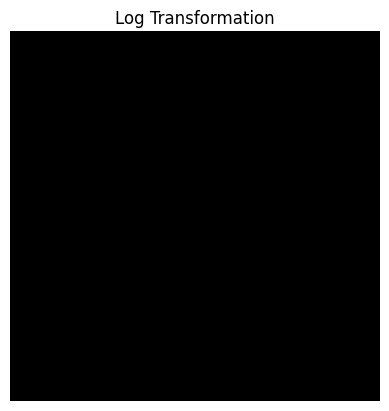

In [7]:
c = 255 / np.log(1 + np.max(synthetic))
log_img = c * np.log(1 + synthetic)
log_img = np.uint8(log_img)

plt.imshow(log_img, cmap='gray')
plt.title("Log Transformation")
plt.axis('off')


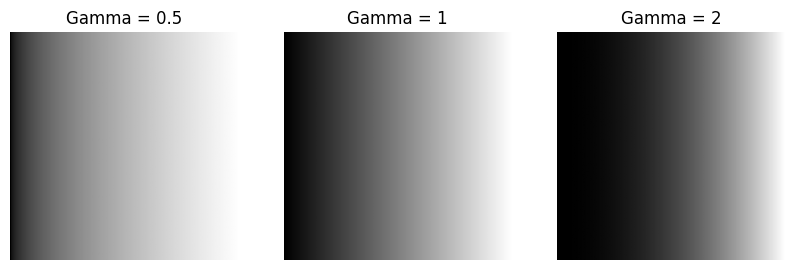

In [8]:
gammas = [0.5, 1, 2]

plt.figure(figsize=(10,3))
for i, g in enumerate(gammas):
    gamma_img = np.uint8(255 * (synthetic / 255) ** g)
    plt.subplot(1,3,i+1)
    plt.imshow(gamma_img, cmap='gray')
    plt.title(f"Gamma = {g}")
    plt.axis('off')


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

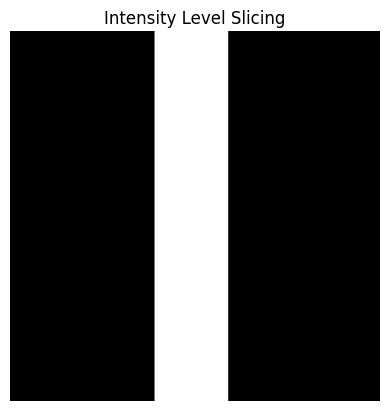

In [9]:
sliced = np.zeros_like(synthetic)
sliced[(synthetic >= 100) & (synthetic <= 150)] = 255

plt.imshow(sliced, cmap='gray')
plt.title("Intensity Level Slicing")
plt.axis('off')


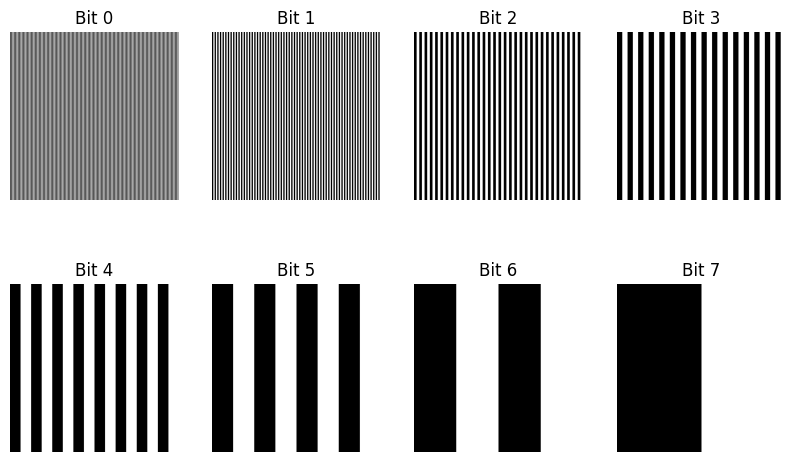

In [10]:
plt.figure(figsize=(10,6))
for i in range(8):
    bit_plane = (synthetic >> i) & 1
    plt.subplot(2,4,i+1)
    plt.imshow(bit_plane, cmap='gray')
    plt.title(f"Bit {i}")
    plt.axis('off')


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

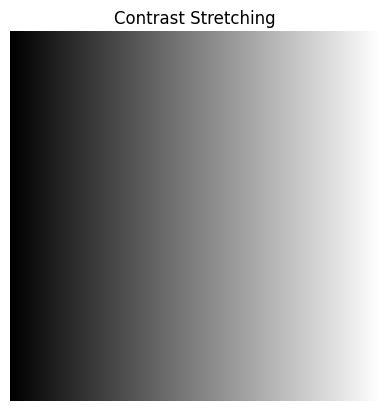

In [11]:
r_min, r_max = synthetic.min(), synthetic.max()
contrast = (synthetic - r_min) * (255 / (r_max - r_min))
contrast = np.uint8(contrast)

plt.imshow(contrast, cmap='gray')
plt.title("Contrast Stretching")
plt.axis('off')


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

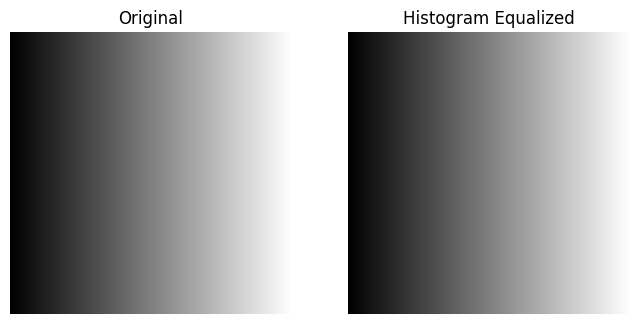

In [12]:
equalized = cv2.equalizeHist(synthetic)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(synthetic, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized")
plt.axis('off')
